# Airports Dataset ✈
<hr>

### Sobre o dataset

Em janeiro de 2017, o OpenFlights Airports Database contém mais de 10.000 aeroportos, estações de trem e terminais de balsas em todo o mundo, conforme mostrado no mapa acima. Cada entrada contém as seguintes informações:

1. ID do aeroporto - Identificador exclusivo do OpenFlights para este aeroporto.

2. Nome - Nome do aeroporto. Pode ou não conter o nome da Cidade.

3. Cidade - Principal cidade servida pelo aeroporto. Pode ser escrito de forma diferente de Nome.

4. País - País ou território onde está localizado o aeroporto. Consulte Países para referência cruzada aos códigos ISO 3166-1.

5. IATA - código IATA de 3 letras. Nulo se não atribuído/desconhecido.

6. ICAO - código ICAO de 4 letras.Nulo se não atribuído.

7. Latitude - Graus decimais, geralmente com seis dígitos significativos. Negativo é Sul, positivo é Norte.

8. Longitude - Graus decimais, geralmente com seis dígitos significativos. Negativo é Oeste, positivo é Leste.

9. Altitude - Em pés.

10. Fuso horário - Compensação de horas do UTC. As horas fracionárias são expressas como decimais, por exemplo. A Índia é 5,5.

11. DST - Horário de verão. Um de E (Europa), A (EUA/Canadá), S (América do Sul), O (Austrália), Z (Nova Zelândia), N (Nenhum) ou U (Desconhecido).

12. Fuso horário do banco de dados Tz - Fuso horário no formato "tz" (Olson), por exemplo. "América/Los_Angeles".

13. Tipo - Tipo do aeroporto. Valor "aeroporto" para terminais aéreos, "estação" para estações de trem, "porto" para terminais de balsas e "desconhecido" se não for conhecido. Em airports.csv, apenas type=airport está incluído.

14. Fonte - Fonte desses dados. "OurAirports" para dados provenientes de OurAirports, "Legacy" para dados antigos não correspondentes a OurAirports (principalmente DAFIF), "User" para contribuições de usuários não verificadas. Em airports.csv, apenas source=OurAirports está incluído.

Os dados que serão utilizados para analise foram extraidos no seguinte link: https://openflights.org/data.html.

### Importando dados

In [1]:
#importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# inserindo dados e colunas
url = 'https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat'

columns = ['id','city', 'country', 'IATA', 'ICAO', 'latitude', 'longitude', 
           'altitude', 'timezone', 'dst', 'ts_database', 'type', 'source']

In [3]:
dados = pd.read_csv(url, names=columns, sep=',', na_values='?', skipinitialspace= True, encoding='utf-8')
dados.head()

,id,city,country,IATA,ICAO,latitude,longitude,altitude,timezone,dst,ts_database,type,source
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


### Analisando

In [4]:
# informações sobre o dataframe
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7698 entries, 1 to 14110
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           7698 non-null   object 
 1   city         7649 non-null   object 
 2   country      7698 non-null   object 
 3   IATA         7698 non-null   object 
 4   ICAO         7698 non-null   object 
 5   latitude     7698 non-null   float64
 6   longitude    7698 non-null   float64
 7   altitude     7698 non-null   int64  
 8   timezone     7698 non-null   object 
 9   dst          7698 non-null   object 
 10  ts_database  7698 non-null   object 
 11  type         7698 non-null   object 
 12  source       7698 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 842.0+ KB


In [5]:
# verificando valores nulos
dados.isnull().sum()

id              0
city           49
country         0
IATA            0
ICAO            0
latitude        0
longitude       0
altitude        0
timezone        0
dst             0
ts_database     0
type            0
source          0
dtype: int64

In [6]:
# tamanho do dataset
dados.shape

(7698, 13)

In [7]:
# dados estatisticos
dados.describe()

,latitude,longitude,altitude
count,7698.000000,7698.000000,7698.000000
mean,25.808442,-1.390546,1015.873344
std,28.404946,86.519162,1628.775132
min,-90.000000,-179.876999,-1266.000000
25%,6.907983,-78.974699,63.000000
50%,34.085701,6.375653,352.000000
75%,47.239551,56.000599,1203.000000
max,89.500000,179.951004,14472.000000


In [8]:
# verificando a correlação entre dados
dados.corr().round(4)

,latitude,longitude,altitude
latitude,1.0000,-0.2767,-0.1045
longitude,-0.2767,1.0000,-0.0446
altitude,-0.1045,-0.0446,1.0000


## Resolvendo as questões

Qual o tamanho do arquivo airports.dat?

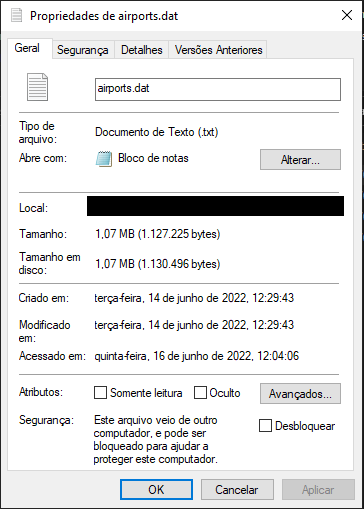

In [9]:
#Considerando o dataset airports.dat, qual a distância entre os aeroportos Jorge Newbery Airpark e Guarulhos?
perg7 = dados[['id', 'latitude', 'longitude']]
perg7

,id,latitude,longitude
1,Goroka Airport,-6.081690,145.391998
2,Madang Airport,-5.207080,145.789001
3,Mount Hagen Kagamuga Airport,-5.826790,144.296005
4,Nadzab Airport,-6.569803,146.725977
5,Port Moresby Jacksons International Airport,-9.443380,147.220001
...,...,...,...
14106,Rogachyovo Air Base,71.616699,52.478298
14107,Ulan-Ude East Airport,51.849998,107.737999
14108,Krechevitsy Air Base,58.625000,31.385000
14109,Desierto de Atacama Airport,-27.261200,-70.779198


In [10]:
!pip install haversine

In [11]:
from haversine import haversine

In [12]:
#procurando valores de latitude e longitude
jorge = perg7.query('`id` == "Jorge Newbery Airpark"')
jorge

,id,latitude,longitude
2442,Jorge Newbery Airpark,-34.5592,-58.4156


In [13]:
#procurando valores de latitude e longitude
guarulhos = perg7.query('`id` == "Guarulhos - Governador André Franco Montoro International Airport"')
guarulhos

,id,latitude,longitude
2564,Guarulhos - Governador André Franco Montoro In...,-23.435556,-46.473057


In [14]:
#inserindo os resultados em variaveis
jorge = (-34.5592,-58.4156)
guarulhos= (-23.435556,-46.473057)

In [15]:
# por fim calculando a distancia em km usando a biblioteca haversine
perg7 = haversine(jorge, guarulhos)
perg7

1693.9996279229154

In [16]:
#Considerando o dataset airports.dat, quantos aeroportos existem na cidade de São Paulo?
perg8 = dados[['country', 'city']]
perg8

,country,city
1,Papua New Guinea,Goroka
2,Papua New Guinea,Madang
3,Papua New Guinea,Mount Hagen
4,Papua New Guinea,Nadzab
5,Papua New Guinea,Port Moresby
...,...,...
14106,Russia,Belaya
14107,Russia,Ulan Ude
14108,Russia,Novgorod
14109,Chile,Copiapo


In [17]:
perg8 = perg8.query('`country` == "Brazil" and `city` == "Sao Paulo"')
perg8.count()

country    3
city       3
dtype: int64

In [18]:
#Considerando o dataset airports.dat, quantos aeroportos o Brasil possui?
perg9 = dados[['country']]
perg9

,country
1,Papua New Guinea
2,Papua New Guinea
3,Papua New Guinea
4,Papua New Guinea
5,Papua New Guinea
...,...
14106,Russia
14107,Russia
14108,Russia
14109,Chile


In [19]:
perg9= perg9.query('`country` == "Brazil"')
perg9.count()

country    264
dtype: int64

In [20]:
#Considerando o dataset airports.dat, qual cidade apresenta a maior quantidade de aeroportos?
dados['city'].value_counts()

London            9
Columbus          8
Georgetown        7
San Jose          7
Moscow            6
                 ..
Isla Rey Jorge    1
Rancagua          1
Vallenar          1
Osorno            1
Melitopol         1
Name: city, Length: 6955, dtype: int64

In [21]:
#Considerando o dataset airports.dat, qual país apresenta a maior quantidade de aeroportos?
dados['country'].value_counts()

United States    1512
Canada            430
Australia         334
Russia            264
Brazil            264
                 ... 
Anguilla            1
Isle of Man         1
Macau               1
Jersey              1
Wake Island         1
Name: country, Length: 237, dtype: int64

In [22]:
# Considerando o dataset airports.dat, qual aeroporto apresenta a maior altitude?
perg12 = dados[['id', 'altitude']]
perg12

,id,altitude
1,Goroka Airport,5282
2,Madang Airport,20
3,Mount Hagen Kagamuga Airport,5388
4,Nadzab Airport,239
5,Port Moresby Jacksons International Airport,146
...,...,...
14106,Rogachyovo Air Base,272
14107,Ulan-Ude East Airport,1670
14108,Krechevitsy Air Base,85
14109,Desierto de Atacama Airport,670


In [23]:
perg12.max()

id          Žilina Airport
altitude             14472
dtype: object